Model for Adjusted net enrollment rate, primary Disparity:
  Mean Squared Error: 22.532085785525286
  R-squared: 0.09915154367175416



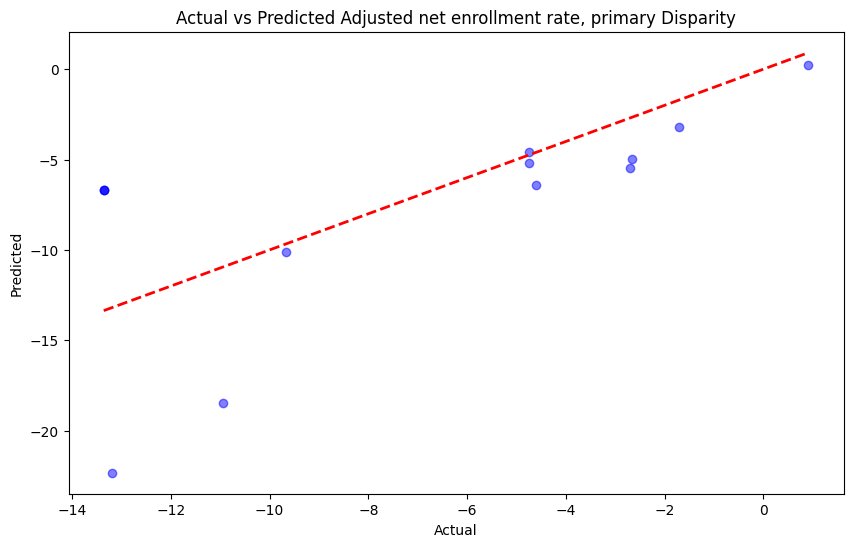

Model for Literacy rate, adult Disparity:
  Mean Squared Error: 29.2503420350559
  R-squared: 0.6836267335087892



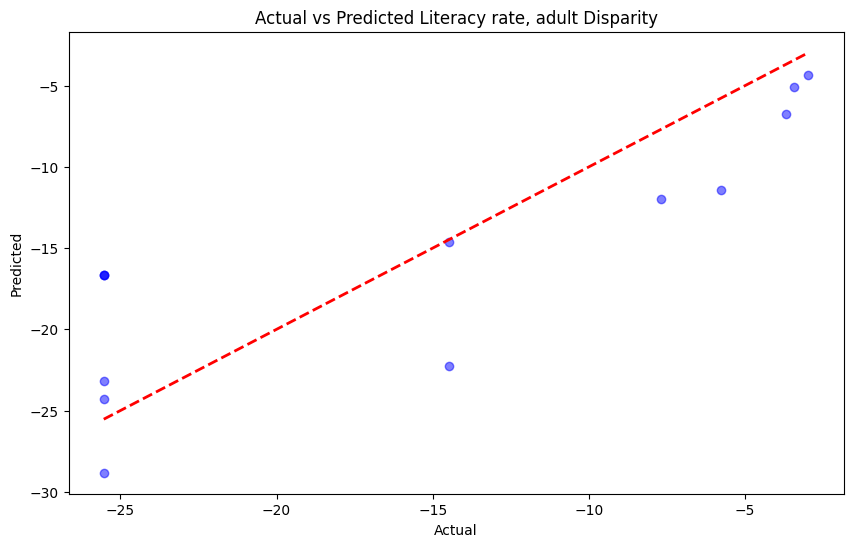

Model for Literacy rate, youth Disparity:
  Mean Squared Error: 6.744833846949875
  R-squared: 0.6027298725987312



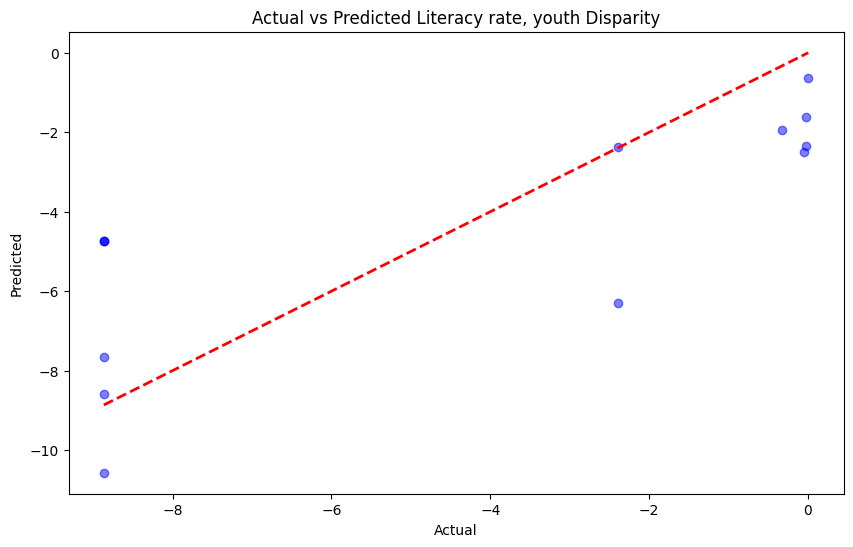

Model for Primary completion rate Disparity:
  Mean Squared Error: 1.1953216219289047
  R-squared: 0.7888182612348529



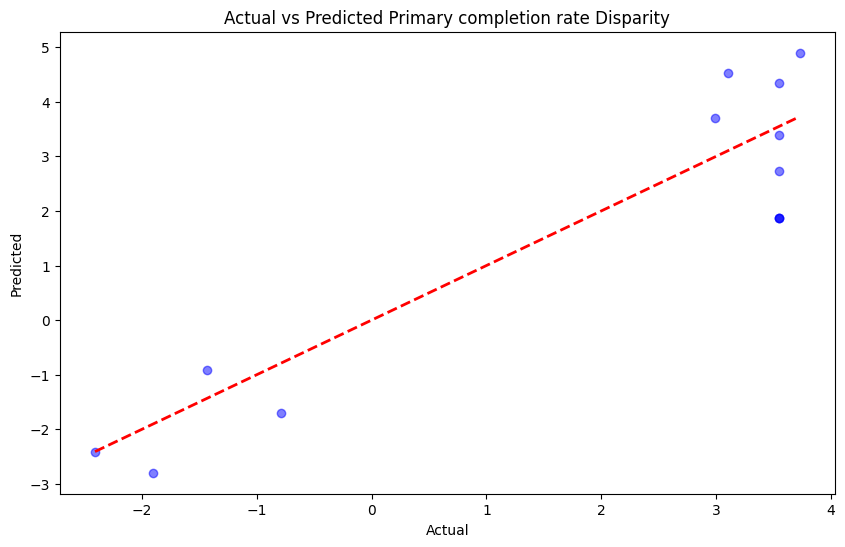

Model for Repeaters, primary Disparity:
  Mean Squared Error: 20.783255906520044
  R-squared: 0.9194970197056189



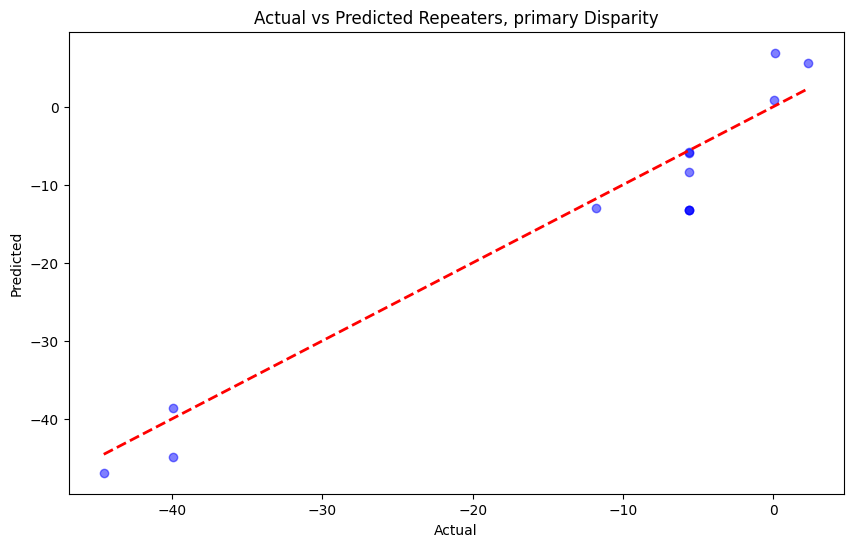

Model for School enrollment, preprimary Disparity:
  Mean Squared Error: 108.51966567445304
  R-squared: 0.20987600254239103



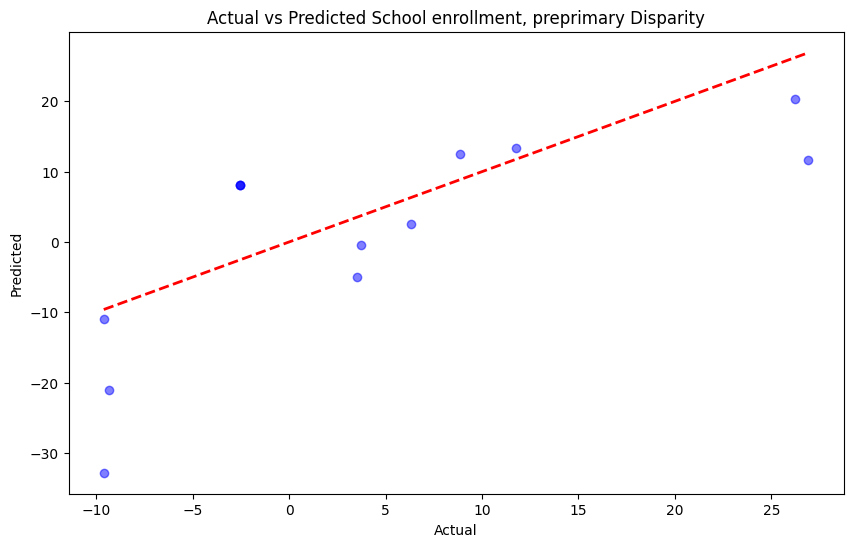

Model for School enrollment, primary (gross) Disparity:
  Mean Squared Error: 19.0657390245431
  R-squared: 0.4383136613483739



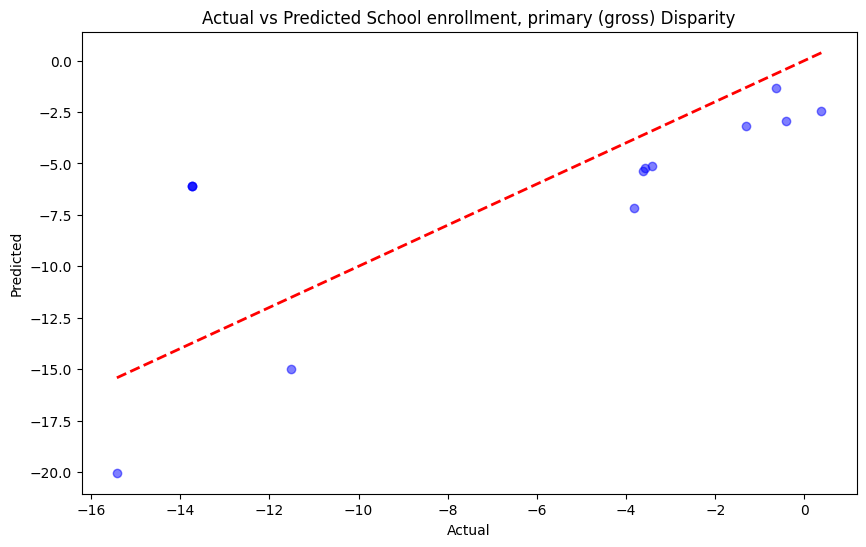

Model for School enrollment, primary (net) Disparity:
  Mean Squared Error: 22.371515318408818
  R-squared: 0.08669436335914493



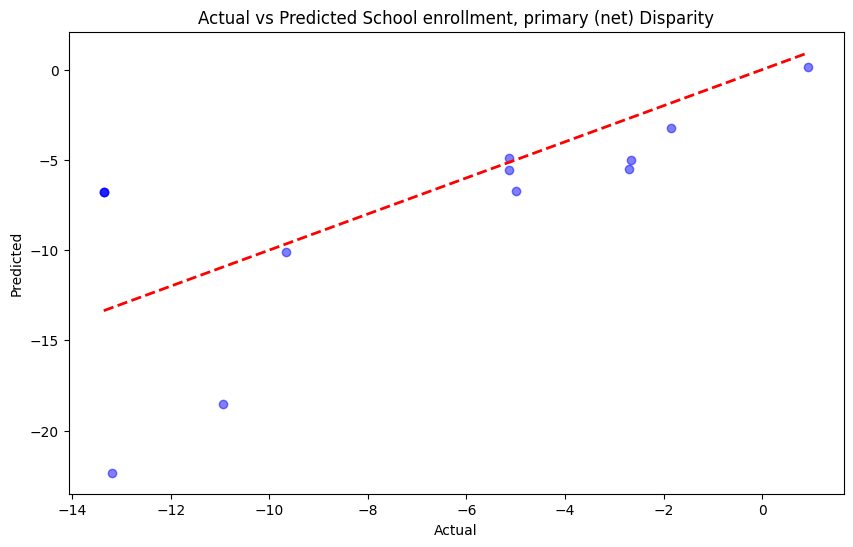

Model for School enrollment, secondary (gross) Disparity:
  Mean Squared Error: 249.84097727268357
  R-squared: 0.4485405157094807



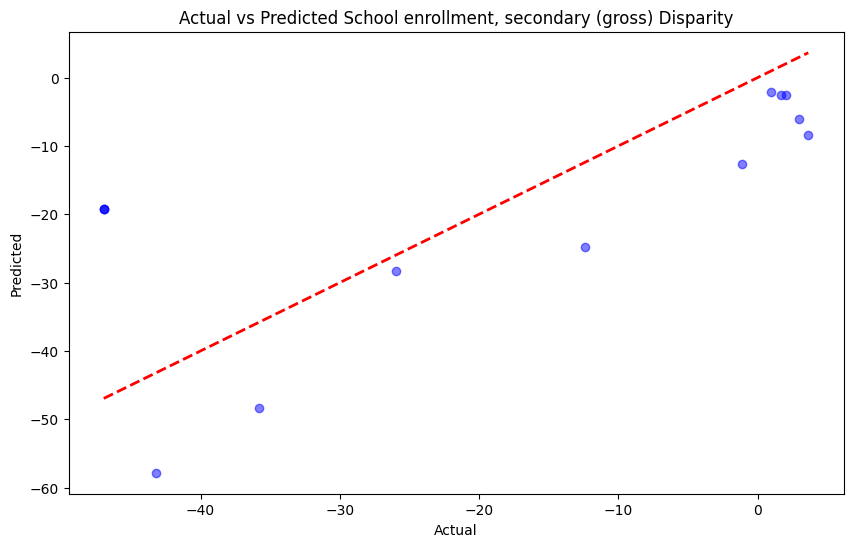

Model for School enrollment, secondary (net) Disparity:
  Mean Squared Error: 136.7926853214215
  R-squared: 0.5868615080745399



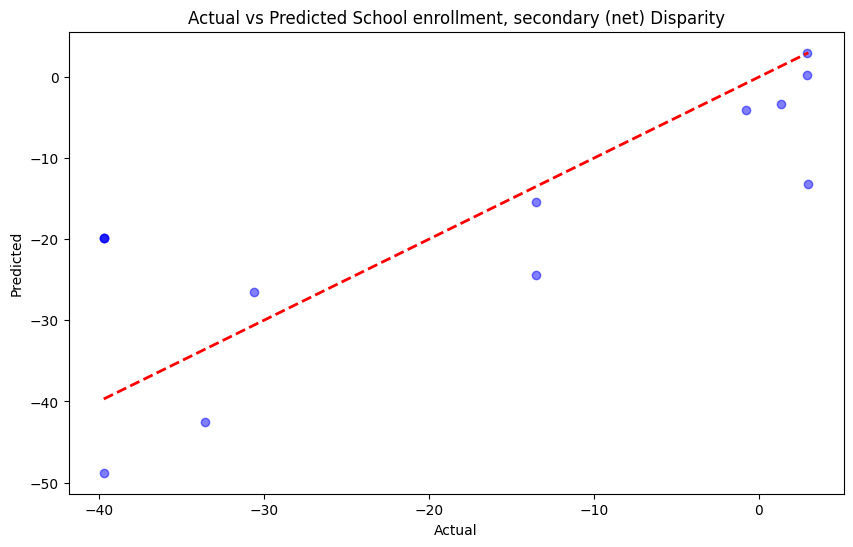

Model for School enrollment, tertiary Disparity:
  Mean Squared Error: 333.8799053428655
  R-squared: 0.7148850195479812



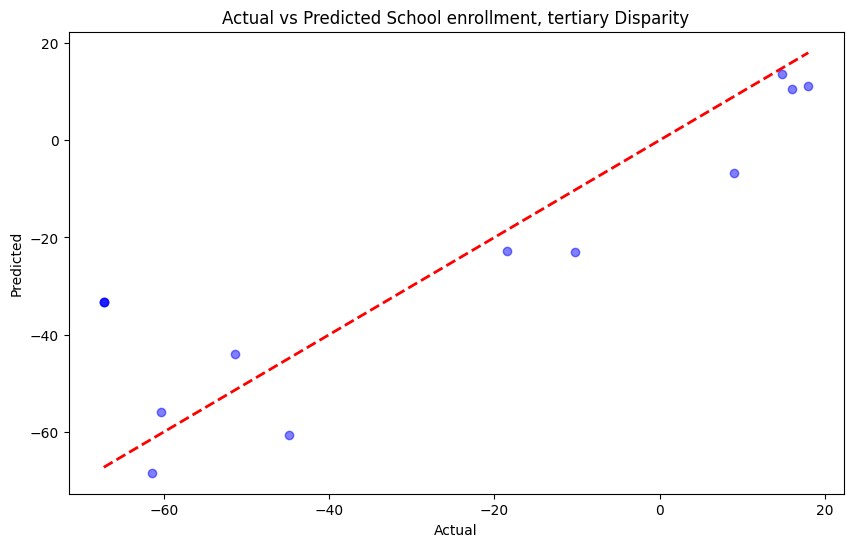

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the cleaned dataset with disparity index
file_path_disparity = 'Cleaned_Gender_IDN_with_Disparity.csv'
data_disparity = pd.read_csv(file_path_disparity)

# Load the original normalized dataset
file_path_original = 'Normalized_Gender_IDN.csv'
data_original = pd.read_csv(file_path_original)

# Define features (X) based on columns in the original dataset
features = [
    'Adjusted net enrollment rate, primary, female (% of primary school age children)',
    'Adjusted net enrollment rate, primary, male (% of primary school age children)',
    'Literacy rate, adult female (% of females ages 15 and above)',
    'Literacy rate, adult male (% of males ages 15 and above)',
    'Literacy rate, youth female (% of females ages 15-24)',
    'Literacy rate, youth male (% of males ages 15-24)',
    'Primary completion rate, female (% of relevant age group)',
    'Primary completion rate, male (% of relevant age group)',
    'Repeaters, primary, female (% of female enrollment)',
    'Repeaters, primary, male (% of male enrollment)',
    'School enrollment, preprimary, female (% gross)',
    'School enrollment, preprimary, male (% gross)',
    'School enrollment, primary, female (% gross)',
    'School enrollment, primary, female (% net)',
    'School enrollment, primary, male (% gross)',
    'School enrollment, primary, male (% net)',
    'School enrollment, secondary, female (% gross)',
    'School enrollment, secondary, female (% net)',
    'School enrollment, secondary, male (% gross)',
    'School enrollment, secondary, male (% net)',
    'School enrollment, tertiary, female (% gross)',
    'School enrollment, tertiary, male (% gross)'
]

# Define targets (disparity indices) based on columns in the disparity dataset
targets = [
    'Adjusted net enrollment rate, primary Disparity',
    'Literacy rate, adult Disparity',
    'Literacy rate, youth Disparity',
    'Primary completion rate Disparity',
    'Repeaters, primary Disparity',
    'School enrollment, preprimary Disparity',
    'School enrollment, primary (gross) Disparity',
    'School enrollment, primary (net) Disparity',
    'School enrollment, secondary (gross) Disparity',
    'School enrollment, secondary (net) Disparity',
    'School enrollment, tertiary Disparity'
]

# Impute missing values in the original dataset
imputer = SimpleImputer(strategy='mean')
data_original_imputed = pd.DataFrame(imputer.fit_transform(data_original), columns=data_original.columns)

# We will create a model for each target (disparity index)
models = {}
predictions = {}
for target in targets:
    # Prepare features and target
    X = data_original_imputed[features]
    y = data_disparity[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    models[target] = model

    # Make predictions
    y_pred = model.predict(X_test)
    predictions[target] = y_pred

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model for {target}:')
    print(f'  Mean Squared Error: {mse}')
    print(f'  R-squared: {r2}')
    print()

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted {target}')
    plt.show()
